<a href="https://colab.research.google.com/github/lukebene/Codigos-Treinos/blob/master/quarentenadados_lbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1


In [0]:
import pandas as pd
import seaborn as sns


In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId","titulo","generos"]
filmes.head(5)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
#notas.shape

In [0]:
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

In [0]:
print(len(notas_medias_por_filme), len(filmes))

9724 9742


In [0]:
filmes = filmes.join(notas_medias_por_filme, on="filmeId")

In [0]:
filmes.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
avaliacoes.groupby("filmeId")["nota"].count()

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [0]:
numero_de_avaliacao = avaliacoes.groupby("filmeId")["nota"].count()
numero_de_avaliacao.columns = ["avaliacoes"]
numero_de_avaliacao.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [0]:
filmes.columns = ['filmeId', 'titulo', 'generos', 'media']



In [0]:
filmes = filmes.join(numero_de_avaliacao,on="filmeId")
filmes.rename(columns={"nota":"avaliacoes"},inplace=True)
filmes.head()

,filmeId,titulo,generos,media,avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [0]:
filmes.sort_values("media",ascending=False)

,filmeId,titulo,generos,media,avaliacoes
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN,NaN


## Desafio 1

descobrir os filmes sem nota.

In [0]:
filmes.query("media == 'NaN' ")

,filmeId,titulo,generos,media,avaliacoes
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN,NaN
2499,3338,For All Mankind (1989),Documentary,NaN,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN,NaN


##Desafio2 
Arrendondar a coluna media para duas casas decimais.


In [0]:
filmes['media']=filmes['media'].round(2)
filmes.head()

,filmeId,titulo,generos,media,avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


##Desafio 3
Descobrir os generos dos filmes e quais sao eles.


In [0]:
filmes['generos'].str.split('|', expand=True).stack().unique().tolist()

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

##Desafio 4
Contar o numero de aparição de cada genero.


In [0]:
filmes['generos'].str.get_dummies(sep='|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

##Desafio
plotar o grafico de aparições de cada genero.


<function matplotlib.pyplot.figure>

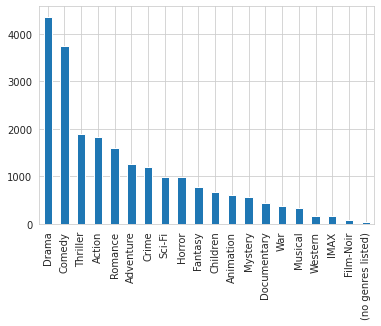

In [0]:
import matplotlib.pyplot as plt

figure = filmes['generos'].str.split('|', expand=True).stack().value_counts().plot(kind="bar")
plt.figure

# Aula 2


In [0]:
filmes["generos"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

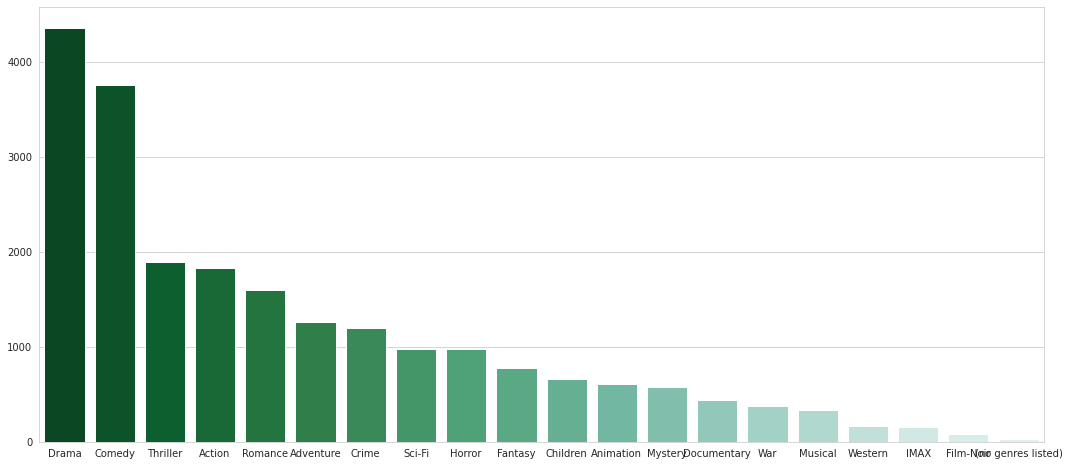

In [0]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(18,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r",n_colors=len(filmes_por_genero)+3))
plt.show()

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

##Desafio 1 do @Guilherme Silveira
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

<function matplotlib.pyplot.show>

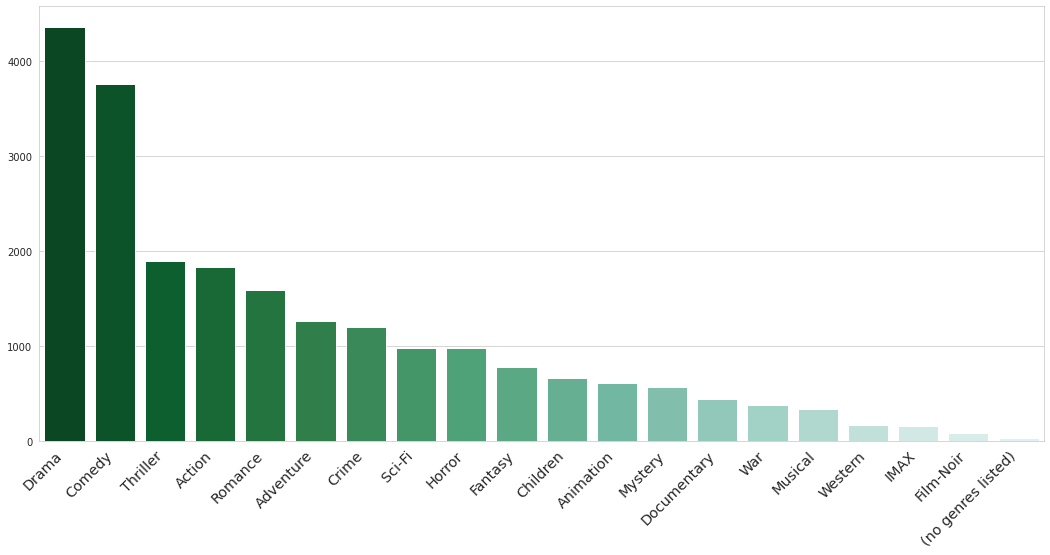

In [0]:
#plt.xticks(rotation=45);
plt.figure(figsize=(18,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r",n_colors=len(filmes_por_genero)+3))

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show

##Desafio 2 do Paulo Silveira
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

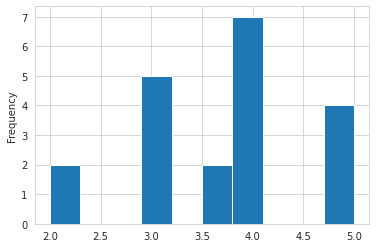

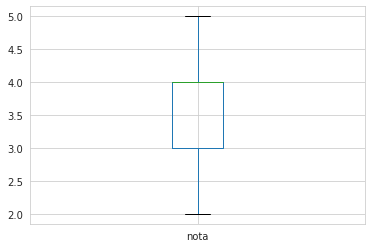

count    20.000000
mean      3.700000
std       0.909019
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
filmes_selecionados_Id=filmes.query("media==3.7 and avaliacoes>15")['filmeId']

plot_filme(filmes_selecionados_Id.values[0])


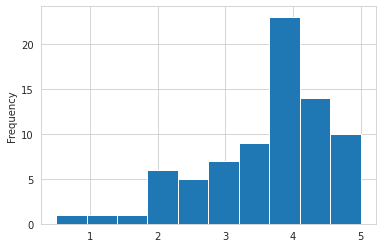

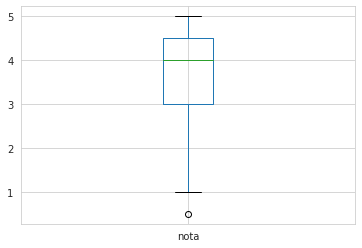

count    77.000000
mean      3.701299
std       1.017155
min       0.500000
25%       3.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(filmes_selecionados_Id.values[1])

##Desafio 3 do Paulo Silveira
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
top_filmes = filmes.sort_values(by="avaliacoes", ascending=False).head(10)
top_filmes


,filmeId,titulo,generos,media,avaliacoes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


In [0]:
#plt.figure(figsize=(15,8))
#plt.title('Top 10 filmes mais avaliados na amostra')

#boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=45)
#top_filmes_lista=top_filmes['filmeId'].to_list()



#sns.boxplot(data = avaliacoes.query(f"filmeId in @top_filmes_lista"), x='filmeId', y='nota')
#plt.show()

##Desafio 4 do Guilherme Silveira
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

##Desafio 5 do Allan Spadini
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

##Desafio 6 da Thais André
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

##Desafio 7 do Thiago Gonçalves
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

# Aula 03


## Introdução

Olá, seja bem-vinda e bem-vindo ao notebook da **aula 03**! A partir desta aula iremos analisar e discutir uma base de dados junto com você. Por isso, será **importante que as discussões nos vídeos sejam acompanhadas** para entender todos os processos das análises.



Nessa aula utilizaremos uma base totalmente nova, que nós também não conhecíamos até o momento da análise. Você vai acompanhar a exploração e, principalmente, as dificuldades ao analisar uma base de dados desconhecida.

Vamos começar importando a nossa base de dados! Nessa aula iremos trabalhar com a IMBD 5000, base que contém uma série de informações sobre filmes, sendo uma pequena amostra da famosa base de dados [IMBD](https://www.imdb.com/).

In [0]:
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Como você acompanhou, iniciamos a aula tentando conhecer as diversas colunas de cada filme e uma das que chamou mais a atenção foi a color. Vamos conhecer quais valores temos nesta colunas?!

In [0]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

Verificamos que essa coluna **color** informa se o filme é colorido ou é preto e branco. Vamos descobrir agora quantos filmes de cada tipo nós temos:

In [0]:
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [0]:
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

Agora já descobrimos quantos filmes coloridos e preto e branco temos, e também sabemos que há mais de 5000 filmes na base. Fizemos algo novo, que foi chamar o `value_counts()`, passando o parâmetro **normalize como True**. Desse modo, já calculamos qual é a participação de cada um dos tipos de filmes (**95% são filmes coloridos**).

Excelente! Agora vamos explorar outra coluna a fim de conhecer os diretores que tem mais filmes na nossa base de dados (**lembrando que nossa base é uma amostra muito pequena da realidade**)

In [0]:
imdb["director_name"].value_counts()

Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
                     ..
Arthur Hiller         1
David Winters         1
Vincente Minnelli     1
Tom Sanchez           1
Walter Murch          1
Name: director_name, Length: 2398, dtype: int64

**Steven Spielberg e Woody Allen** são os diretores com mais filmes no **IMDB 5000**.

Continuando com nossa exploração de algumas informações, vamos olhar para o número de críticas por filmes.

In [0]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [0]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

Veja que as colunas **color** e **director_name** são *strings*, não fazendo sentido olhar para médias, medianas e afins. Olhar para o número de avaliações já pode ser interessante, por isso usamos o `.describe()`.

Agora podemos até plotar um histograma para avaliar o número de review.

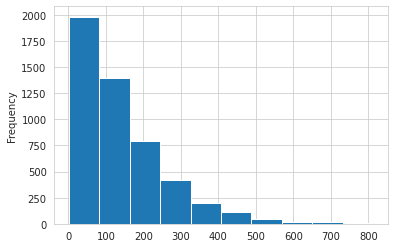

In [0]:
import seaborn as sns
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist')

Verificamos que poucos filmes tem mais de 500 votos, por isso um paralelo que podemos fazer é que filmes com muitos votos são mais populares e filmes com poucos votos não são tão populares. Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso. Claro que não conseguimos afirmar isso com propriedade, pois, novamente, estamos lidando com um número restrito de dados, mas são pontos interessantes de se pensar.

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelo gross:

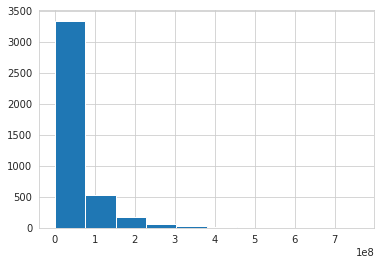

In [0]:
imdb["gross"].hist()

 Como você deve ter reparado, essa é a primeira vez que as escalas estão totalmente diferentes, pois no eixo **X** temos valores tão altos que a escala teve que ser de centena de milhões. Veja como pouquíssimos filmes tem **alto faturamento**, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

 Vamos tentar conhecer quais são esses filmes com faturamento astronômico.


In [0]:
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


Nessa lista temos **Avatar, Titanic, Jurassic World e The Avengers**, o que parece fazer sentido para nós, pois sabemos que esses foram filmes com bilheterias gigantescas. Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido, mas encontramos um problema nos dados, dado que encontramos duas linhas diplicadas. Podemos usar o pandas para remover esses dados, mas por enquanto vamos manter todas as informações (Se estiver curioso em saber como se faz, consulte o [`.drop_duplicates()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)).

Maravilha, agora temos o faturamento e parece estar OK. Queremos começar a responder algumas perguntas e uma delas é: será que filmes coloridos tem faturamento maior que filmes preto e branco?

Para começar a responder essa pergunta precisamos transformar a coluna Color:

In [0]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [0]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Veja que agora nós temos uma última coluna em nosso dataframe com valores 0 e 1. Agora podemos construir gráficos com essa informação de filmes coloridos ou não.

P.S: Em aula tivemos problemas porque Black and White tinha um espaço no início, vou cortar esses detalhes aqui no notebook, mas reforço a importância de acompanhar este processo no vídeo.

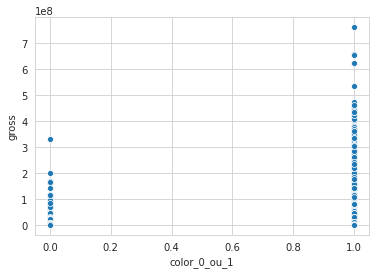

In [0]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

Então plotamos nossos dados com um displot! Existem várias formas de visualizar essa informação, mas por ora essa nos ajuda a comparar os resultados. Repare como filmes coloridos tem valores bem maiores (isso já era até esperado), mas também temos pontos bem altos em filmes preto e branco, chamando muito atenção.

Vamos explorar algumas estatísticas destes filmes:

In [0]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [0]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [0]:
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

Das estatísticas temos duas bem interessantes, a média e mediana das notas de filmes preto e branco são maiores. Há várias possíveis explicações sobre o porquê disso, reflita aí sobre algumas delas e compartilhe conosco!


A partir de agora, vamos fazer uma investigação melhor em relação às finanças dos filmes (faturamento e orçamento). Vamos iniciar plotando e interpretando um gráfico de **gross** por **budget**:

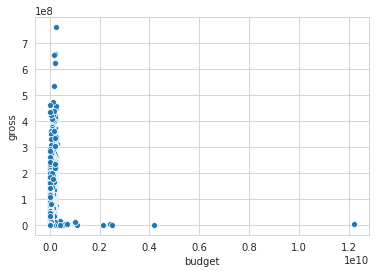

In [0]:
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

Para plotar os dados, primeiro removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0, para então gerar o gráfico.

Agora vamos analisar esse gráfico juntos, veja que a escala de **budget** mudou, agora é **e10**. Repare que apenas poucos filmes tem orçamentos tão grandes assim, e seus faturamentos são muito baixos. Será que temos algum problema nos dados? Vamos investigar melhor!

In [0]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Ordenando os dados pelo **budget** percebemos que as primeiras posições são de filmes asiáticos. O Guilherme trouxe um ponto interessante para a investigação, pois países como a Coreia usam moedas que tem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes. 

Como não temos garantia dos números, vamos precisar trabalhar apenas com filmes americanos, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

##Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja no LinkedIn. Boa sorte!

In [0]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

Veja que temos filmes de diversos locais de origem:

In [0]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Agora temos os dados para fazer uma análise melhor entre gross e budget. Vamos plotar o gráfico novamente:



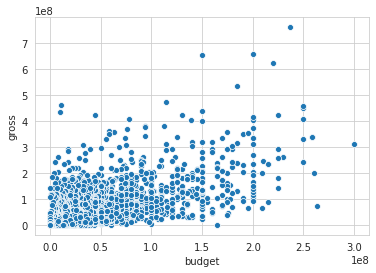

In [0]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

Veja que interessante, aparentemente temos uma relação entre orçamento e faturamento. Quanto maior o orçamento, maior o faturamento.

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


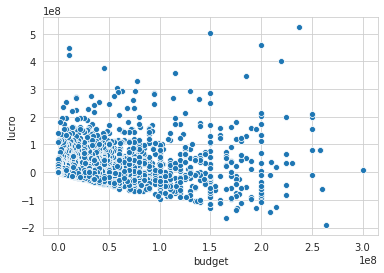

In [0]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

MUito bom! Nós construímos nossa coluna lucro na base de dados e plotamos o orçamento contra lucro.

Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuizo. Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes). Outros pontos interessantes de se anlisar seriam os filmes com baixos orçamentos e muito lucro, será que são estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade? 

Esse gráfico é muito rico em informações, vale a pena você gastar um tempo criando hipóteses.

Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos continuar! Mas agora quero ver o lucro em relação ao ano de produção:

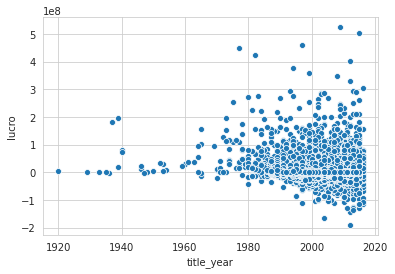

In [0]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

Olha que legal esse gráfico, veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

Outro ponto que chama muito atenção, são os filmes da década de 30 e 40 com lucros tão altos. Quais serão esses filmes? Bom, essa pergunta você vai responder no desafio do Paulo, que está louco para descobrir!

Falando em Paulo, ele sugeriu uma análise com os nome dos diretores e o orçamento de seus filmes, vamos ver se conseguimos concluir alguma coisa:

In [0]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


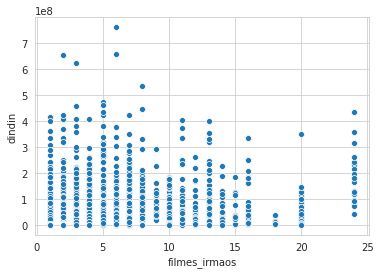

In [0]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

Essa imagem aparentemente não é muito conclusiva, então não conseguimos inferir tantas informações.

Esse processo de gerar dados, visualizações e acabar não sendo conclusivo é muito comum na vida de um cientista de dados, pode ir se acostumando =P.

Para finalizar, que tal realizar uma análise das correlações dos dados? EXistem várias formas de calcular a correlação, esse é um assunto denso.Você pode ler mais sobre essas métricas neste [link](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o).

Vamos então inciar a análise das correlações plotando o pairplot.

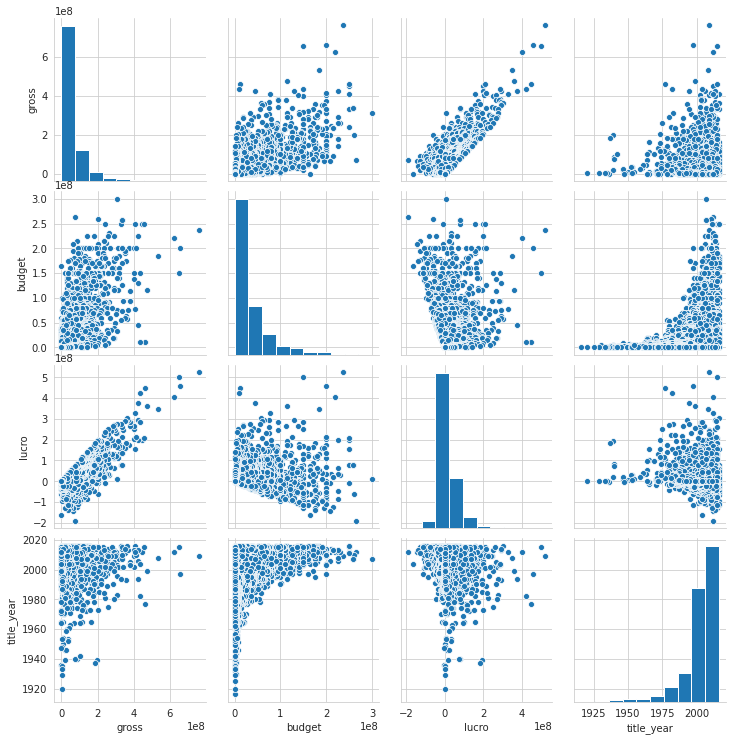

In [0]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

O pairplot mostra muita informação e a melhor forma de você entender é assistindo as conclusões que tiramos sobre esses gráficos na vídeoaula.

Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do `.corr()` do [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [0]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


Com o pandas é simples de se calcular a correlação, mas precisamos saber interpretar os resultados. Vamos fazer isso?

A correlação é uma métrica que vai de 1 a -1. Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10. Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10. Agora quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra. 

Agora sim, entendido sobre a correlação vamos analisar as nossas. Veja que lucro e gross tem uma correlação alta, o que indica que quanto maior o orçamento maior o lucro (mas repare que a correlação não é perfeita), já o title_yers e lucro tem correlação negativa, mas muito perto de zero (ou seja quase não tem correlação). Viu como conseguimos analisar muitas coisas com a correlação?! Pense e tente analisar os outros casos também.


Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando, cada vez mais legal e ao mesmo tempo mais complexo né?

O que importa é estar iniciando e entendendo o que fazemos para analisar os dados! **Continue até o fim, garanto que vai valer a pena.**
Vamos praticar?

**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!

**P.S: A partir de agora teremos muitos desafios envolvendo mais análises e conclusões, então não haverá um "gabarito". O importante é você compartilhar suas soluções com os colegas e debater os seus resultados e das outras pessoas**

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

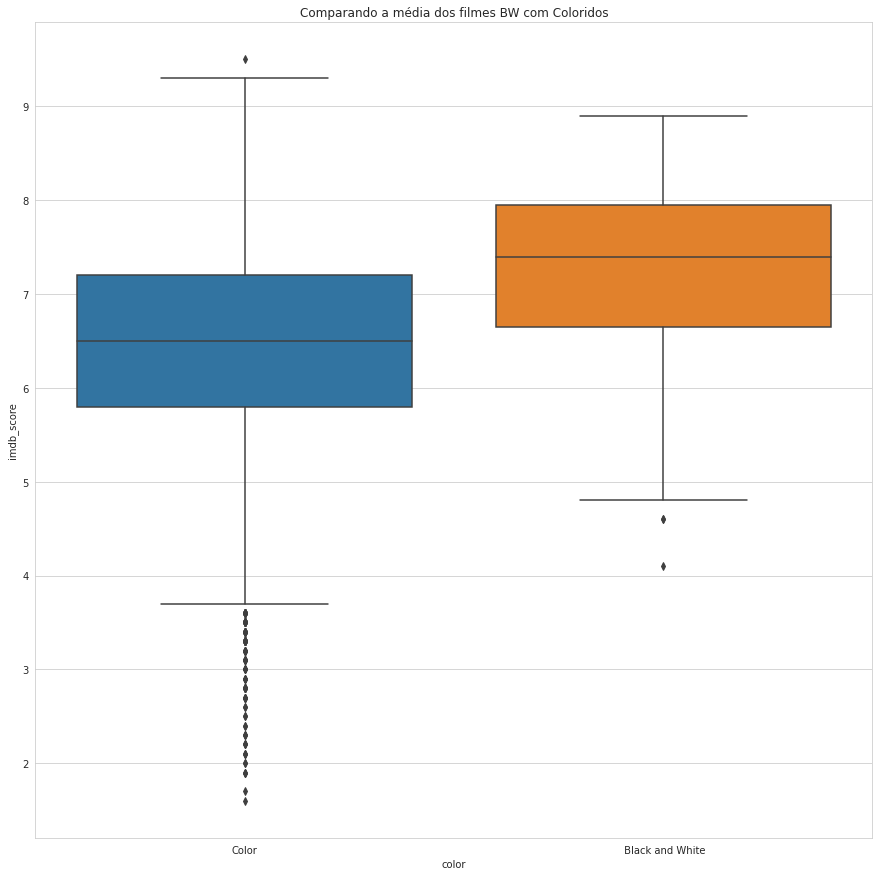

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.boxplot(x='color',y='imdb_score',data= imdb)
plt.title('Comparando a média dos filmes BW com Coloridos')
plt.show()

Comparando as medias de notas do imdb_score, selecionando os filmes por Cor(color) ou Preto e Branco( Black and White), é possivel perceber algo que foi comentado pelo Paulo Silveira, onde tirando os filmes recentes feitos em BW, as medidas de quartis deles sao mais proximas, revelando que a maioria dessas notas podem ter sido dadas por cinefolos ou consumidores de filmes "cult" enquanto os filmes coloridos ja possuem medias mais dispersas. 

##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [0]:
imdb_usa.query('budget >= 2500000 ').sort_values(by='lucro').head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
91,Color,Robert Zemeckis,188.0,100.0,0.0,267.0,Eddie Deezen,15000.0,665426.0,Adventure|Animation|Family|Fantasy,Tom Hanks,The Polar Express,120798,16264,Peter Scolari,0.0,boy|christmas|christmas eve|north pole|train,http://www.imdb.com/title/tt0338348/?ref_=fn_t...,444.0,English,USA,G,165000000.0,2004.0,726.0,6.6,2.35,10000,-164334574.0
28,Color,Peter Berg,377.0,131.0,532.0,627.0,Alexander Skarsgård,14000.0,65173160.0,Action|Adventure|Sci-Fi|Thriller,Liam Neeson,Battleship,202382,26679,Tadanobu Asano,0.0,box office flop|hawaii|naval|oahu hawaii|ship,http://www.imdb.com/title/tt1440129/?ref_=fn_t...,751.0,English,USA,PG-13,209000000.0,2012.0,10000.0,5.9,2.35,44000,-143826840.0
85,Color,Carl Rinsch,218.0,128.0,47.0,982.0,Cary-Hiroyuki Tagawa,18000.0,38297305.0,Action|Adventure|Drama|Fantasy,Keanu Reeves,47 Ronin,116994,20965,Jin Akanishi,2.0,box office flop|ronin|samurai|shogun|tournament,http://www.imdb.com/title/tt1335975/?ref_=fn_t...,324.0,English,USA,PG-13,175000000.0,2013.0,1000.0,6.3,2.35,35000,-136702695.0
49,Color,Bryan Singer,338.0,114.0,0.0,140.0,Ewen Bremner,979.0,65171860.0,Adventure|Fantasy,Eddie Marsan,Jack the Giant Slayer,106416,1766,Ralph Brown,1.0,bean|giant|king|no opening credits|princess,http://www.imdb.com/title/tt1351685/?ref_=fn_t...,205.0,English,USA,PG-13,195000000.0,2013.0,557.0,6.3,2.35,22000,-129828140.0


Acredito que o filme seja John Carter

##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)


Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [0]:
imdb_usa.sort_values(by='title_year',ascending=False).head(15)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
2238,Color,Henry Joost,86.0,96.0,24.0,374.0,Marc John Jefferies,646.0,28876924.0,Adventure|Crime|Mystery|Sci-Fi|Thriller,Samira Wiley,Nerve,4303,1780,Emily Meade,0.0,dare|game|knocked out|motorcycle|online game,http://www.imdb.com/title/tt3531824/?ref_=fn_t...,35.0,English,USA,PG-13,20000000.0,2016.0,441.0,7.1,NaN,0,8876924.0
1029,Color,Ben Stiller,226.0,102.0,0.0,1000.0,Will Ferrell,14000.0,28837115.0,Comedy,Milla Jovovich,Zoolander 2,34964,24107,Justin Theroux,4.0,chosen one|fashion|fashion model|model|retired,http://www.imdb.com/title/tt1608290/?ref_=fn_t...,150.0,English,USA,PG-13,50000000.0,2016.0,8000.0,4.8,2.35,28000,-21162885.0
3373,Color,Justin Tipping,6.0,80.0,2.0,102.0,Natalie Stephany Aguilar,861.0,NaN,Adventure,Tina Gilton,Kicks,59,1279,Justin Hall,NaN,NaN,http://www.imdb.com/title/tt4254584/?ref_=fn_t...,6.0,English,USA,R,NaN,2016.0,163.0,7.8,NaN,240,NaN
640,Color,Craig Gillespie,178.0,117.0,44.0,531.0,Abraham Benrubi,788.0,27550735.0,Action|Drama|History|Thriller,Michael Raymond-James,The Finest Hours,27481,3524,Graham McTavish,0.0,1950s|coast guard|oil tanker|sinking ship|surv...,http://www.imdb.com/title/tt2025690/?ref_=fn_t...,113.0,English,USA,PG-13,NaN,2016.0,562.0,6.8,2.35,12000,NaN
3756,Color,Bille Woodruff,12.0,96.0,23.0,503.0,Brandy Norwood,927.0,9658370.0,Comedy|Romance,Donald Faison,The Perfect Match,1180,3552,Lauren London,6.0,NaN,http://www.imdb.com/title/tt4871980/?ref_=fn_t...,9.0,English,USA,R,5000000.0,2016.0,509.0,4.5,NaN,740,4658370.0
73,Color,David Ayer,418.0,123.0,452.0,329.0,Robin Atkin Downes,10000.0,161087183.0,Action|Adventure|Comedy|Sci-Fi,Will Smith,Suicide Squad,118992,11287,Ike Barinholtz,8.0,based on comic book|critically bashed|father d...,http://www.imdb.com/title/tt1386697/?ref_=fn_t...,971.0,English,USA,PG-13,175000000.0,2016.0,336.0,6.9,2.35,80000,-13912817.0
150,Color,Paul Feig,464.0,116.0,176.0,322.0,Kate McKinnon,783.0,118099659.0,Action|Comedy|Fantasy|Sci-Fi,Ed Begley Jr.,Ghostbusters,69757,2097,Zach Woods,4.0,ghost|ghostbuster|ghostbusters|male objectific...,http://www.imdb.com/title/tt1289401/?ref_=fn_t...,1211.0,English,USA,PG-13,144000000.0,2016.0,370.0,5.5,2.35,62000,-25900341.0
3199,Color,Jason Zada,185.0,93.0,4.0,4.0,Stephanie Vogt,533.0,26583369.0,Horror|Mystery|Thriller,Eoin Macken,The Forest,20837,578,Gen Seto,1.0,forest|japan|suicide|suicide forest|supernatural,http://www.imdb.com/title/tt3387542/?ref_=fn_t...,127.0,English,USA,PG-13,10000000.0,2016.0,35.0,4.8,1.85,10000,16583369.0
4953,Color,Nate Parker,21.0,120.0,664.0,400.0,Nate Parker,990.0,NaN,Biography|Drama,Jason Stuart,The Birth of a Nation,1197,3525,Aunjanue Ellis,1.0,NaN,http://www.imdb.com/title/tt4196450/?ref_=fn_t...,8.0,English,USA,R,10000000.0,2016.0,664.0,5.4,2.35,0,NaN
1427,Color,Nicholas Stoller,177.0,92.0,89.0,190.0,Ike Barinholtz,17000.0,55291815.0,Comedy,Chloë Grace Moretz,Neighbors 2: Sorority Rising,28041,17860,Kiersey Clemons,0.0,bare chested male|gay|gay best friend|gay man|...,http://www.imdb.com/title/tt4438848/?ref_=fn_t...,111.0,English,USA,R,35000000.0,2016.0,329.0,6.0,2.35,0,20291815.0


ultilizado "imdb_usa.sort_values(by='title_year',ascending=False).head(15)", para ter uma visao dos 15 primeiros filmes ordenados pela sua data de publicação, é possivel observar que essa amostra é de 2016, é possivel ver alguns fimes que foram fracaços de bilheteria e critica como X-men, Suicide Squad, Gods of Egypt.. 7 dos quais na amostra estudada ainda estao com budget negativo e 3 como NaN, e olhando para o Imdb_score observa-se notas " baixas".

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [0]:
imdb.query('title_year >1935 & title_year < 1939').sort_values(by='gross').head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4427,Black and White,Charles Chaplin,120.0,87.0,0.0,8.0,Stanley Blystone,309.0,163245.0,Comedy|Drama|Family,Paulette Goddard,Modern Times,143086,352,Fred Malatesta,1.0,actor director writer|invention|machine|music ...,http://www.imdb.com/title/tt0027977/?ref_=fn_t...,211.0,English,USA,G,1500000.0,1936.0,8.0,8.6,1.37,0
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,229,Lucille La Verne,1.0,dwarf|love|princess|queen|snow white,http://www.imdb.com/title/tt0029583/?ref_=fn_t...,204.0,English,USA,Approved,2000000.0,1937.0,47.0,7.7,1.37,0
2904,Black and White,John Cromwell,7.0,101.0,19.0,135.0,Mary Astor,490.0,NaN,Adventure|Drama|Romance,David Niven,The Prisoner of Zenda,3256,1166,Ronald Colman,2.0,coronation|fictitious country|king|princess|sw...,http://www.imdb.com/title/tt0029442/?ref_=fn_t...,44.0,English,USA,Approved,NaN,1937.0,185.0,7.8,1.37,337
4272,Black and White,Henry King,10.0,106.0,85.0,300.0,Don Ameche,480.0,NaN,Drama|Musical|Romance,Tyrone Power,Alexander's Ragtime Band,1381,1833,John Carradine,2.0,band|dance|ragtime|singer|violinist,http://www.imdb.com/title/tt0029852/?ref_=fn_t...,29.0,English,USA,Approved,2000000.0,1938.0,392.0,7.0,1.37,60
4387,Black and White,Frank Capra,51.0,126.0,964.0,275.0,Ann Miller,319.0,NaN,Comedy|Drama|Romance,Jean Arthur,You Can't Take It with You,17799,1363,Lionel Barrymore,10.0,eccentric|friend|house|monopoly|stenographer,http://www.imdb.com/title/tt0030993/?ref_=fn_t...,133.0,English,USA,Approved,1644736.0,1938.0,302.0,8.0,1.37,0
4508,Black and White,Michael Curtiz,24.0,100.0,345.0,94.0,David Niven,843.0,NaN,Action|Adventure|Romance|War,Errol Flynn,The Charge of the Light Brigade,3418,1621,Spring Byington,3.0,attack|fort|india|lancer|massacre,http://www.imdb.com/title/tt0027438/?ref_=fn_t...,52.0,English,USA,Approved,1200000.0,1936.0,490.0,7.1,1.37,204


O filme produzido pre ww2 que tem um lucro astronomico é Branca de Neve e os sete anoes a animação original.

## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [0]:
gross_director.query('filmes_irmaos >15 & filmes_irmaos < 20')['director_name'].unique()

array(['Tim Burton', 'Spike Lee', 'Woody Allen'], dtype=object)

In [0]:
gross_director.query('director_name == "Woody Allen"').describe()

,dindin,filmes_irmaos
count,1.500000e+01,18.0
mean,1.298065e+07,18.0
std,1.058520e+07,0.0
min,3.203044e+06,18.0
25%,5.169472e+06,18.0
50%,1.056907e+07,18.0
75%,1.573857e+07,18.0
max,3.920000e+07,18.0


Se me recordo do Paulo indicando os filmes sobre o numero 18, apos as duas analises acima é perceptivel que é o proprio Woody Allen, atravez do describe o dindin vai de 3.22x10^6 ate 3.92x10^7 na escala que era em base 10^8 é pouco.

## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

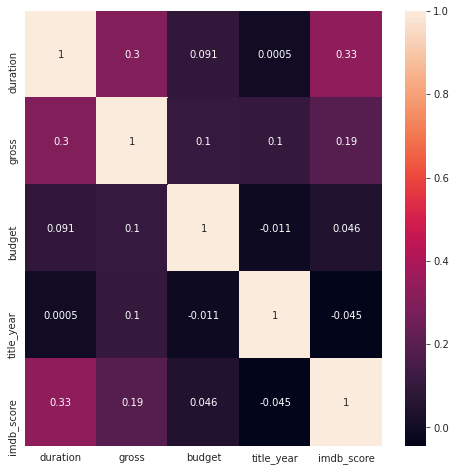

In [0]:
filmes_2k = imdb.query('title_year > 2000')
plt.figure(figsize=(8,8))
sns.heatmap(filmes_2k[['duration','gross','budget','title_year','imdb_score']].corr(),annot=True)
plt.show()

Fazendo um corte na base de dados, olhando somente pra duração,gross,budget, e score, nao tem nenhuma correlação forte, e somente o ano tem uma relação negativa.

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


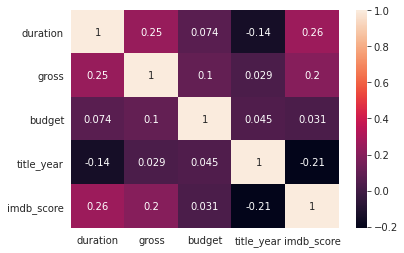

In [0]:
sns.heatmap(imdb[['duration','gross','budget','title_year','imdb_score']].corr(),annot=True)
plt.show()

Olhando para o imdb_score.corr(), parece pouco influenciado pelas caracteristicas selecionadas, apenas que o ano influencia negativamente na media, que pode ser novamente apontado que filmes mais antigos sao vistos por pessoas tendenciosas a dar notas boas por ja gostarem desses filmes.

#Aula 4

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do **ENEM 2018**. Esse será o primeiro passo para construir os **modelos de machine learning da aula 05**. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este [**link aqui**](https://github.com/guilhermesilveira/enem-2018).

Vamos iniciar setando a precisão de casas decimais que o pandas irá exibir os dados (`pd.options.display.float_format`), depois lendo e conhecendo as informações contidas na base de dados.



In [0]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


Conheça todas as colunas do nosso dataframe:

In [0]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Na videoaula tivemos uma discussão muito bacana sobre uma visão geral dos dados e sua organização, e sobre ética na IA. Se você não assistiu eu recomendo que veja, não cabe aqui no notebook reproduzir a conversa, então vamos seguir com o  desenvolvimento.


Conhecidas as informações, vamos chamar o **describe()** para analisá-las. Se atente ao detalhe que o **describe** só gera informação de dados numéricos!

In [0]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

A saída do `describe` traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento.  Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação. 

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos! Como nosso tempo aqui é restrito, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
len(dados_notas)

97270

Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o `.dropna()` e trocamos os nomes das colunas para ficar mais legível. 

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o `.corr()`:

In [0]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre **linguagem_codigo e ciencias_humanas**, o que parece fazer sentido. Uma correlação que surpreende é entre **linguagem_codigo e redacao**. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente. 

**Mais alguma correlação te chama a atenção? **

Eu tenho mais uma análise das correlações em geral! Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido).
Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses. **Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!**

Na videoaula você viu que tentamos plotar diversos gráficos para visualizar a correlação de uma melhor forma. Abaixo seguem os códigos usados:

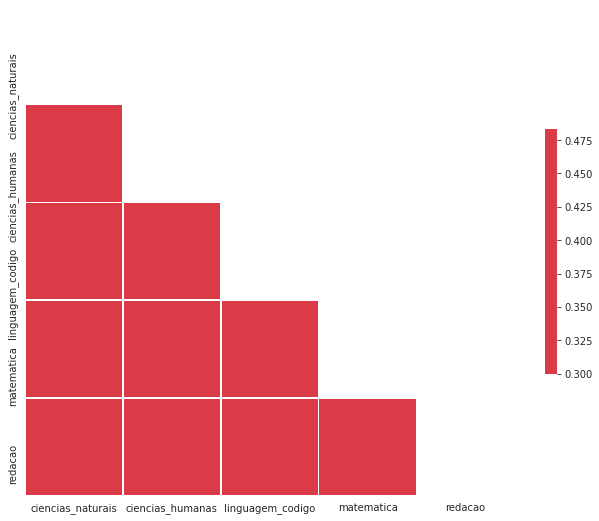

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

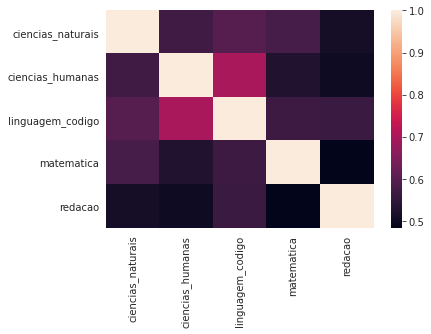

In [0]:
sns.heatmap(corr)

Depois de apanhar tentando criar boas imagens, resolvemos deixar esse desafio para você kkkkk... Resolva e dê aquela cornetada em nosso time uahuahha...

Ok, nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de ML para fazer as predições de algumas notas. Para criar esse modelo de machine learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo. 

Então, vamos ao **pairplot**:

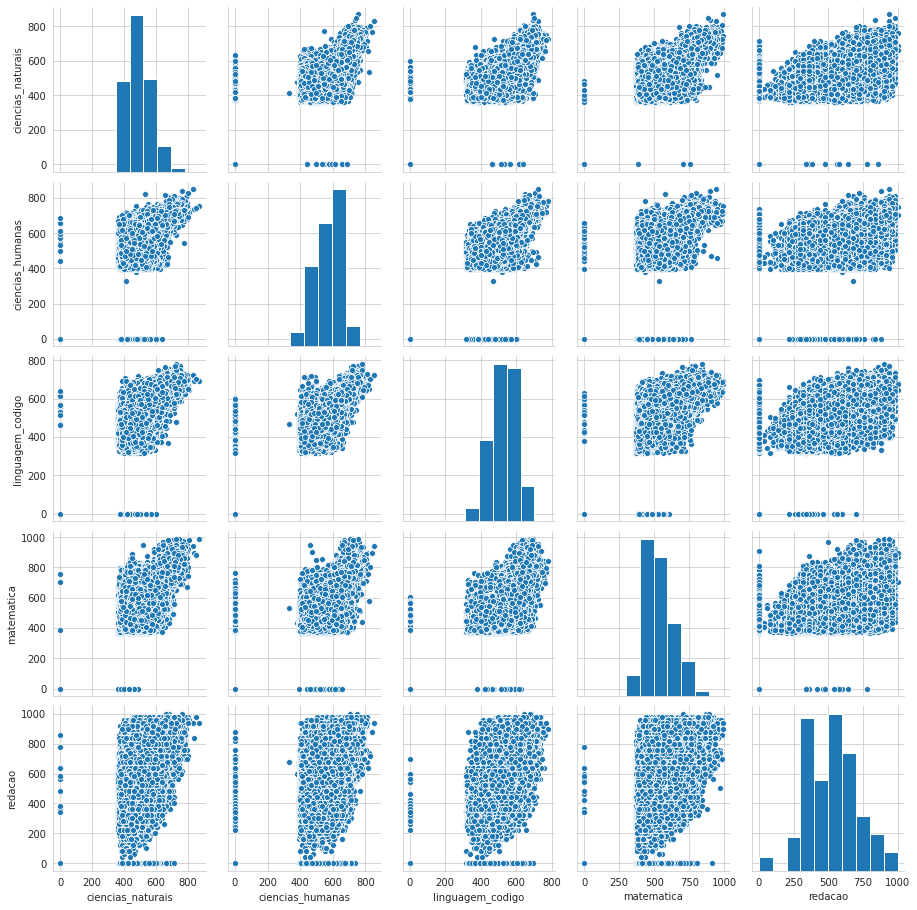

In [0]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível (para detalhes das análises, acompanhe a discussão na videoaula).

Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando?

Agora iremos entrar em uma área totalmente nova: o desenvolvimento de modelos de machine learning! Espero que você esteja empolgado(a) para conhecer um pouquinho mais sobre esse assunto!

Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para você.

Até a próxima aula!


P.S: A partir de agora você irá colocar a mão na massa, nossos desafios serão mais analítcos. Queremos que você vivencie o dia-a-dia de um ciêntista de dados, discutindo suas conclusões no Slack e estudando as análises de outros colegas, por isso não haverá gabarito.

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [0]:
# base de dados: "dados"

# dados de presença
# 'TP_PRESENCA_CN' (0 - FALTOU / 1 - PRESENTE / 2 - ELIMINADO)
# 'TP_PRESENCA_CH' (0 - FALTOU / 1 - PRESENTE / 2 - ELIMINADO)
# 'TP_PRESENCA_LC' (0 - FALTOU / 1 - PRESENTE / 2 - ELIMINADO)
# 'TP_PRESENCA_MT' (0 - FALTOU / 1 - PRESENTE / 2 - ELIMINADO)

# Notas por prova
# 'NU_NOTA_CN'
# 'NU_NOTA_CH'
# 'NU_NOTA_LC'
# 'NU_NOTA_MT'
# 'NU_NOTA_REDACAO'

# Criando uma cópia do dataframe para evitar alterações no df original
# Referência:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
dados_faltas = dados.copy()

# Alteração para nota 0 - Faltas e eliminações CN, CH, LC, MT
# Referência:
# https://stackoverflow.com/questions/45470219/set-values-based-on-df-query
tps=["CN","CH","LC","MT"]
for tp in tps:
  
  dados_faltas.loc[dados_faltas.eval(f"TP_PRESENCA_{tp} == 0 | TP_PRESENCA_{tp} == 2"), f"NU_NOTA_{tp}"] = 0
  

# A prova de redação é executada em conjunto com a de LC (mesma presença)
tp="LC"

dados_faltas.loc[dados_faltas.eval(f"TP_PRESENCA_{tp} == 0 | TP_PRESENCA_{tp} == 2"), "NU_NOTA_REDACAO"] = 0


# Verificação se houve alteração no dataframe original
dados.query(f"TP_PRESENCA_{tp} == 0 | TP_PRESENCA_{tp} == 2")[["NU_NOTA_REDACAO"]].head()

,NU_NOTA_REDACAO
0,nan
4,nan
5,nan
7,nan
14,nan


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

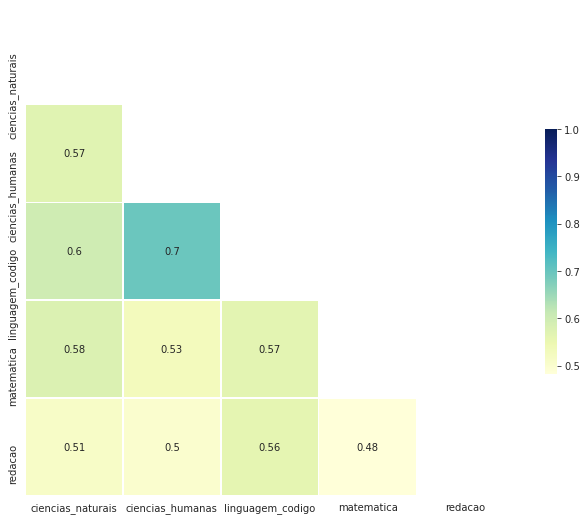

In [0]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", 
            annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

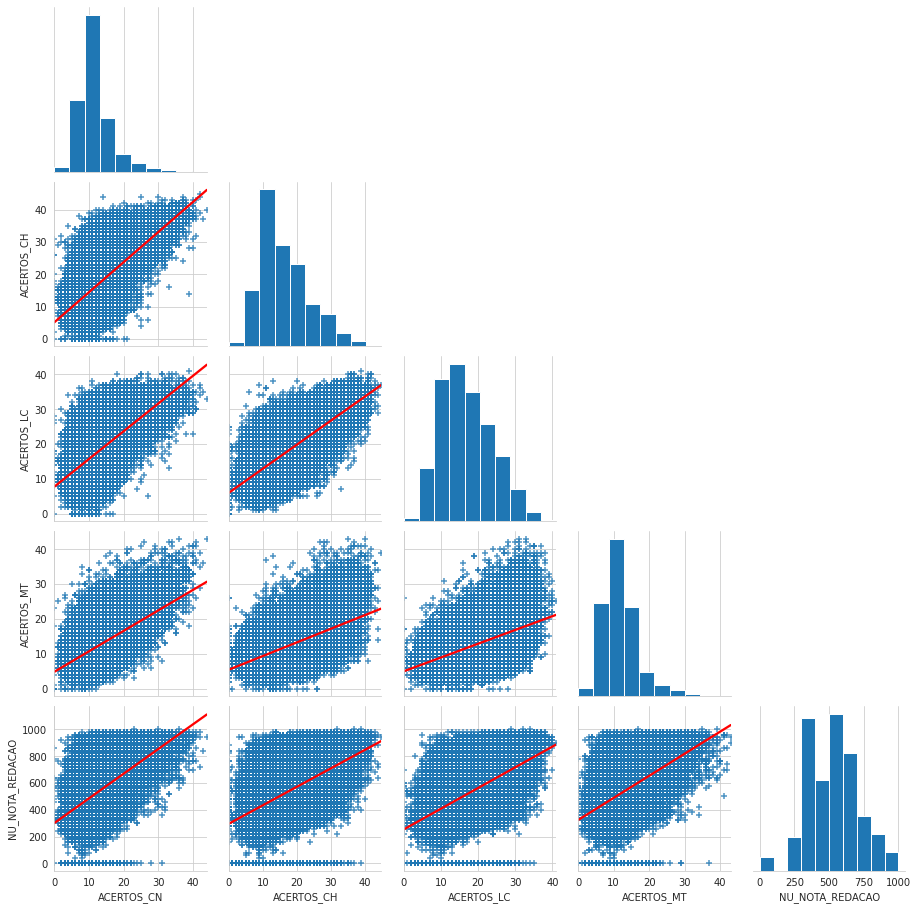

,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,NU_NOTA_REDACAO
ACERTOS_CN,1.00,0.62,0.57,0.57,0.48
ACERTOS_CH,0.62,1.00,0.74,0.57,0.54
ACERTOS_LC,0.57,0.74,1.00,0.54,0.56
ACERTOS_MT,0.57,0.57,0.54,1.00,0.44
NU_NOTA_REDACAO,0.48,0.54,0.56,0.44,1.00


In [0]:
# TX_RESPOSTAS_CN / TX_GABARITO_CN
# TX_RESPOSTAS_CH / TX_GABARITO_CH
# TX_RESPOSTAS_LC / TX_GABARITO_LC
# TX_RESPOSTAS_MT / TX_GABARITO_MT

def calc_acertos(respostas,gabarito):
  return [sum(c==d for c, d in zip(a,b)) for a, b in zip(respostas, gabarito)]

dados_faltas = dados_faltas.dropna(subset=['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT',
                                           'TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT'])

dados_faltas["ACERTOS_CN"] = calc_acertos(dados_faltas["TX_RESPOSTAS_CN"], dados_faltas["TX_GABARITO_CN"])

tps=["CN","CH","LC","MT"]
for tp in tps:
  dados_faltas[f"ACERTOS_{tp}"] = calc_acertos(dados_faltas[f"TX_RESPOSTAS_{tp}"], dados_faltas[f"TX_GABARITO_{tp}"])

# Referência:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://stackoverflow.com/questions/50722972/change-the-regression-line-colour-of-seaborns-pairplot

sns.pairplot(dados_faltas[["ACERTOS_CN", "ACERTOS_CH", "ACERTOS_LC", "ACERTOS_MT", "NU_NOTA_REDACAO"]],
             kind='reg', plot_kws={'line_kws':{'color':'red'}},
             markers="+",
             corner=True)
plt.show()

dados_faltas[["ACERTOS_CN", "ACERTOS_CH", "ACERTOS_LC", "ACERTOS_MT", "NU_NOTA_REDACAO"]].corr()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

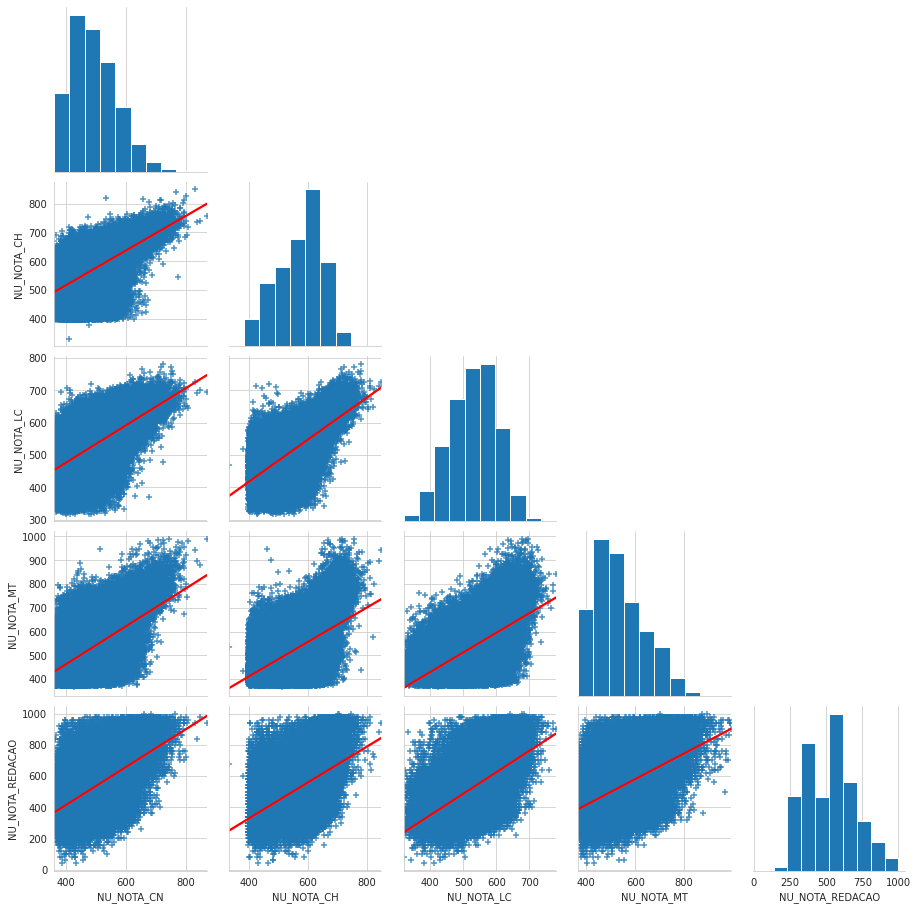

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00,0.58,0.60,0.58,0.53
NU_NOTA_CH,0.58,1.00,0.70,0.54,0.52
NU_NOTA_LC,0.60,0.70,1.00,0.57,0.57
NU_NOTA_MT,0.58,0.54,0.57,1.00,0.50
NU_NOTA_REDACAO,0.53,0.52,0.57,0.50,1.00


In [0]:
dados_non_zero = dados_faltas[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].copy()

# Referência:
# https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741

dados_non_zero = dados_non_zero[~(dados_non_zero == 0).any(axis=1)]

sns.pairplot(dados_non_zero[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]],
             kind='reg', plot_kws={'line_kws':{'color':'red'}},
             markers="+",
             corner=True)
plt.show()

dados_non_zero[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].corr()

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
subset=['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT',
                                           'TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT']
gae = dados_faltas[subset]

gae['TX_RESPOSTAS_CH'].value_counts().head()

.............................................    85
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA    11
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD     8
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC     6
BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB     5
Name: TX_RESPOSTAS_CH, dtype: int64

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

# Aula 5

Nessa aula discutiremos o que é o processo de classificação e como as máquinas podem aprender esse processo. Após essa discussão iniciaremos o tratamento dos dados para criar nosso primeiro modelo de ML.

A primeira coisa que devemos fazer é separar os dados que vamos usar como entrada do nosso modelo, dos que precisamos prever:

In [0]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


Vamos usar as notas das provas de ciências naturais, ciências humanas, matemática e redação para prever as notas da prova de linguagem e códigos. 

Como separamos os dados de entrada, também devemos fazer o mesmo com aqueles que precisamos adivinhar.

In [0]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Agora temos os dados que precisamos classificar, mas repare que essa é toda nossa informação! Se eu treinar um modelo com todos esses dados, como eu vou conseguir medir a qualidade do modelo? 

Por isso precisamos dividir nossos dados em dois grupos, um para treino e outro para teste.

Para fazer isso vamos usar métodos da biblioteca Scikit-learn, ela é uma das principais ferramentas no mundo do Machine Learning! Vale conferir e estudar um pouco mais sobre ela, aqui está o [link para a documentação](https://scikit-learn.org/stable/).

Além do Sklearn, iremos utilizar o numpy para setar o seed dos números pseudo-aleatórios.

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [0]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
30213,524.70,509.30,496.90,620.00
83439,501.40,609.00,532.00,460.00
56490,544.40,649.60,592.80,560.00
135214,415.70,541.20,461.60,560.00
55431,405.50,592.00,571.60,520.00


Feita a divisão dos nossos dados, chegou a hora de criar seu primeiro modelo de Regressão(Em aula discutimos a diferença entre regressão e classificação).

Vamos utilizar o LinearSVR do scikit-learn:

In [0]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Até o momento nós treinamos o modelo apenas com o `.fit()`, mas falta fazer a predição dos resultados. Para realizar a predição chamamos o método `.predict()` do **modelo**.

In [0]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([486.66331109, 540.37793322, 478.79488436, 452.0140805 ,
       533.06419739])

Compare a saída da predição com os valores reais logo abaixo, parece que está fazendo sentido, certo?!

In [0]:
y_teste[:5]

41528   420.20
81918   545.60
22786   518.10
17935   539.20
70617   536.90
Name: linguagem_codigo, dtype: float64

Nos próximos trechos de códigos vamos plotar alguns gráficos! As discussões e todas as análises sobre estas visualizações foram feitas de forma muito rica na videoaula, portanto recomendo fortemente acompanhá-las.

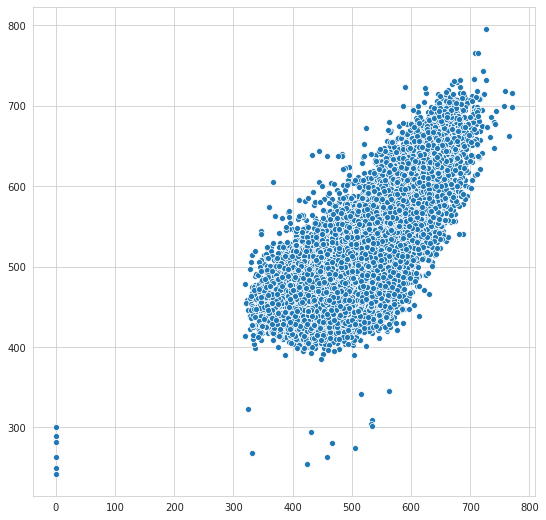

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

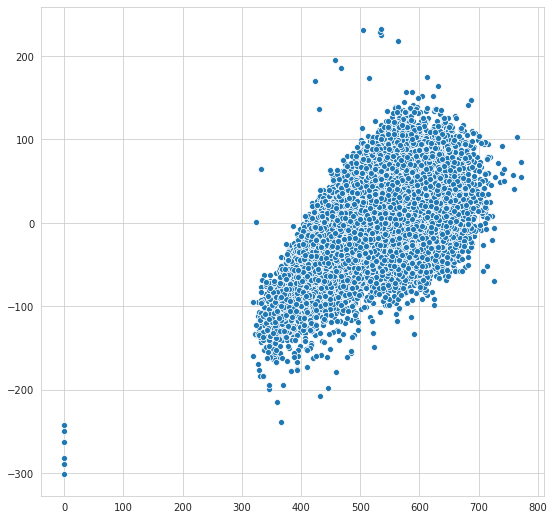

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

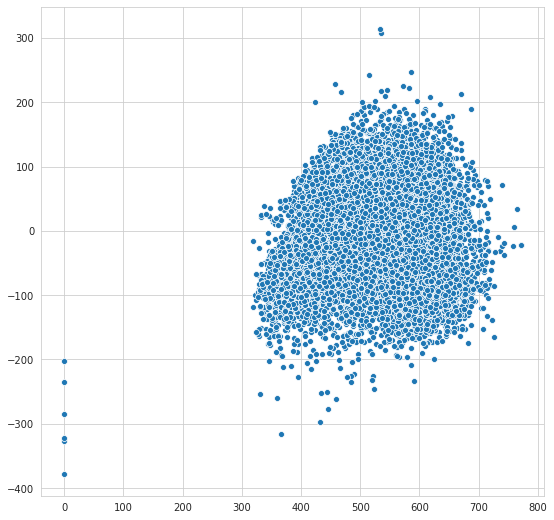

In [0]:
import matplotlib.pyplot as plt

# minha predição TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))


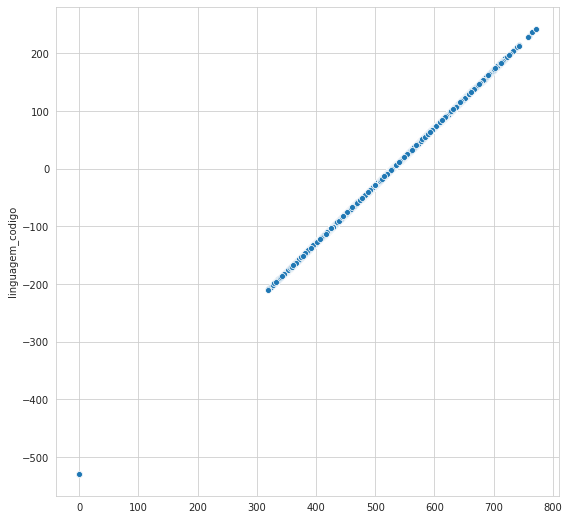

In [0]:
import matplotlib.pyplot as plt

# predição do paulo TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())


Após discutir esses gráficos, vamos criar mais um modelo de **machine learning** basededo em "árvores":

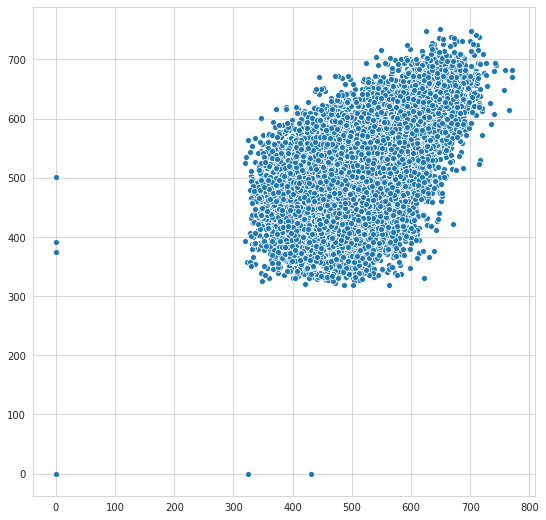

In [0]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

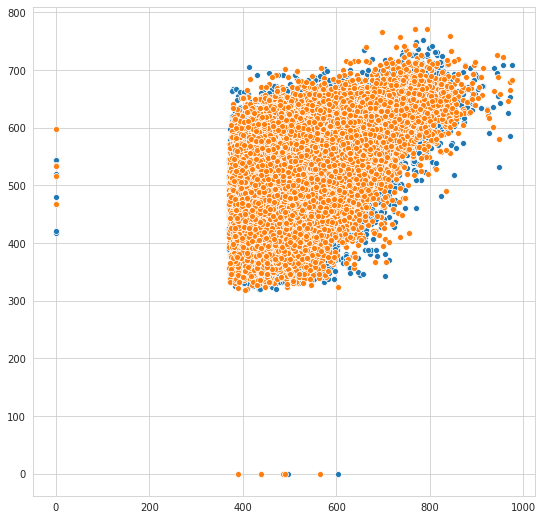

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

Após treinar o modelo e fazer as predições, plotamos duas imagens. A primeira é muito parecida com as os gráficos do primeiro classificador, mas a segunda mostra os valores reais e valores previstos!

Essa figura é muito interessante e mostra uma sobreposição muito boa entre elas, indicando que nossos resultados fazem sentido.

Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem, por isso ficaria complexo avaliar dois ou três modelos apenas com gráficos.

O que precisamos agora é de uma métrica capaz de nos dizer como nosso modelo está indo, aqui vamos usar o [erro quadrático médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio). Existem centenas de métricas de avaliação, tudo vai depender do que você precisa e o que você está prevendo. 

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4134.88

Veja que nosso erro quadrático médio deu em torno dos 4186.22. Embora pelo gráfico nosso modelo pareça muito bom, pela métrica parece ser um pouco alto.

O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor. Veja o resultado quando calculamos o MSE de dois vetores iguais:

In [0]:
mean_squared_error(y_teste, y_teste)

0.00

Nosso resultado é zero! 
Você deve estar se perguntando: meu modelo não está nem perto de zero, será que ele é tão ruim assim?

Nós ainda não temos como te dar essa resposta, precisamos de um critério comparativo, pois assim conseguimos dizer como nosso modelo está indo. Por exemplo, que tal classificar os nossos dados de uma maneira "bobinha"? Para isso temos os chamados métodos **Dummy**.

In [0]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5193.54

Finalmente conseguimos responder se nosso modelo é tão ruim assim! Na realidade nosso modelo não é um dos melhores, temos muito o que melhorar, mas já somos melhores que uma classificação ingênua. 

Com isso, encerramos nossa última aula. Espero que vocês tenham gostado! 

Participem também do nosso **desafio final, valendo um Nintendo Switch**.

Bons estudos e boa sorte!

Forte abraço!

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np

mse = []

for i in range(1,25):
  for j in range(1,25):
   parametros = {'C':i , 'max_iter':(1000+j*j)}
   modelo = LinearSVR(**parametros)
   modelo.fit(x_treino, y_treino);
   predictions = modelo.predict(x_teste);
   mse=mse.append(mean_squared_error(y_teste,predictions))
   




/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AttributeError: ignored

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.